# 3D Graphics Systems | AI Graphics - Theory and Practice | IMPA 2023
### Instructor: Luiz Velho
### TA: Hallison Paz
### Course info: https://lvelho.impa.br/i3d23/

## Lab Class #2 - A demo of some functionalities of PyTorch3D

In [3]:
import os
import sys
import torch
need_pytorch3d=False
try:
    import pytorch3d
except ModuleNotFoundError:
    need_pytorch3d=True
if need_pytorch3d:
    if torch.__version__.startswith(("1.13.", "2.0.")) and sys.platform.startswith("linux"):
        # We try to install PyTorch3D via a released wheel.
        pyt_version_str=torch.__version__.split("+")[0].replace(".", "")
        version_str="".join([
            f"py3{sys.version_info.minor}_cu",
            torch.version.cuda.replace(".",""),
            f"_pyt{pyt_version_str}"
        ])
        !pip install fvcore iopath
        !pip install --no-index --no-cache-dir pytorch3d -f https://dl.fbaipublicfiles.com/pytorch3d/packaging/wheels/{version_str}/download.html
    else:
        # We try to install PyTorch3D from source.
        !pip install 'git+https://github.com/facebookresearch/pytorch3d.git@stable'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fvcore: filename=fvcore-0.1.5.post20221221-py3-none-any.whl size=61429 sha256=a3d057e711a3057a63c765c5f30548fafb83b8288d7bff727df7776ea0a019a7
  Stored in directory: /root/.cache/pip/wheels/01/c0/af/77c1cf53a1be9e42a52b48e5af2169d40ec2e89f7362489dd0
  Created wheel for iopath: filename=iopath-0.1.10-py3-none-any.whl size=31547 sha256=62809800d04d0661c0dd1c7d4e1ae19e85a750b70fdb33e9bc2bb166f06a76ee
  Stored in directory: /root/.cache/pip/wheels/9a/a3/b6/ac0fcd1b4ed5cfeb3db92e6a0e476cfd48ed0df92b91080c1d
Successfully built fvcore iopath
Looking in links: https://dl.fbaipublicfiles.com/pytorch3d/packaging/wheels/py310_cu118_pyt200/dow

## Data Structures

In [4]:
from pytorch3d.structures import Meshes

In [5]:
# Setup
if torch.cuda.is_available():
    device = torch.device("cuda:0")
    torch.cuda.set_device(device)
else:
    device = torch.device("cpu")

In [6]:
!wget -P . https://raw.githubusercontent.com/hallpaz/3dsystems20/master/extensions_utils/cube.py

--2023-05-02 17:59:48--  https://raw.githubusercontent.com/hallpaz/3dsystems20/master/extensions_utils/cube.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1630 (1.6K) [text/plain]
Saving to: ‘./cube.py’

cube.py             100%[===================>]   1.59K  --.-KB/s    in 0s      

2023-05-02 17:59:48 (29.1 MB/s) - ‘./cube.py’ saved [1630/1630]



In [7]:
# Vertex coordinates for a level 0 cube.
_cube_verts0 = [
    [-0.50, 0.50, 0.50],
    [-0.50, -0.50, 0.50],
    [0.50, -0.50, 0.50],
    [0.50, 0.50, 0.50],

    [-0.50, 0.50, -0.50],
    [-0.50, -0.50, -0.50],
    [0.50, -0.50, -0.50],
    [0.50, 0.50, -0.50]
]


# Faces for level 0 cube
_cube_faces0 = [
    [0, 1, 2],
    [2, 3, 0],
    [7, 6, 5],
    [4, 7, 5],
    [6, 3, 2],
    [3, 6, 7],
    [4, 5, 0],
    [0, 5, 1],
    [3, 4, 0],
    [4, 3, 7],
    [2, 1, 5],
    [5, 6, 2],
]

In [8]:
from cube import cube

In [9]:
refinedcube = cube(1, device=device)

In [10]:
verts_list = [torch.tensor(_cube_verts0, device=device), refinedcube.verts_list()[0]]
faces_list = [torch.tensor(_cube_faces0, dtype=torch.int64, device=device), refinedcube.faces_list()[0]]

mesh_batch = Meshes(verts=verts_list, faces=faces_list)

## Packed and Padded Tensors

In [11]:
# packed representation
verts_packed = mesh_batch.verts_packed()

# auxiliary tensors
mesh_to_vert_idx = mesh_batch.mesh_to_verts_packed_first_idx()
vert_to_mesh_idx = mesh_batch.verts_packed_to_mesh_idx()

# edges
edges = mesh_batch.edges_packed()

# face normals
face_normals = mesh_batch.faces_normals_packed()

In [12]:
verts_packed

tensor([[-0.5000,  0.5000,  0.5000],
        [-0.5000, -0.5000,  0.5000],
        [ 0.5000, -0.5000,  0.5000],
        [ 0.5000,  0.5000,  0.5000],
        [-0.5000,  0.5000, -0.5000],
        [-0.5000, -0.5000, -0.5000],
        [ 0.5000, -0.5000, -0.5000],
        [ 0.5000,  0.5000, -0.5000],
        [-0.5000,  0.5000,  0.5000],
        [-0.5000, -0.5000,  0.5000],
        [ 0.5000, -0.5000,  0.5000],
        [ 0.5000,  0.5000,  0.5000],
        [-0.5000,  0.5000, -0.5000],
        [-0.5000, -0.5000, -0.5000],
        [ 0.5000, -0.5000, -0.5000],
        [ 0.5000,  0.5000, -0.5000],
        [-0.5000,  0.0000,  0.5000],
        [ 0.0000,  0.0000,  0.5000],
        [ 0.0000,  0.5000,  0.5000],
        [-0.5000,  0.5000,  0.0000],
        [-0.5000,  0.0000,  0.0000],
        [ 0.0000, -0.5000,  0.5000],
        [-0.5000, -0.5000,  0.0000],
        [ 0.5000,  0.0000,  0.5000],
        [ 0.0000, -0.5000,  0.0000],
        [ 0.5000, -0.5000,  0.0000],
        [ 0.0000,  0.5000,  0.0000],
 

In [13]:
mesh_batch.verts_padded()

tensor([[[-0.5000,  0.5000,  0.5000],
         [-0.5000, -0.5000,  0.5000],
         [ 0.5000, -0.5000,  0.5000],
         [ 0.5000,  0.5000,  0.5000],
         [-0.5000,  0.5000, -0.5000],
         [-0.5000, -0.5000, -0.5000],
         [ 0.5000, -0.5000, -0.5000],
         [ 0.5000,  0.5000, -0.5000],
         [ 0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000]],

        [[

## Input / Output

In [14]:
!mkdir -p data
!wget -P data https://dl.fbaipublicfiles.com/pytorch3d/data/cow_mesh/cow.obj
!wget -P data https://dl.fbaipublicfiles.com/pytorch3d/data/cow_mesh/cow.mtl
!wget -P data https://dl.fbaipublicfiles.com/pytorch3d/data/cow_mesh/cow_texture.png

--2023-05-02 17:59:53--  https://dl.fbaipublicfiles.com/pytorch3d/data/cow_mesh/cow.obj
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 52.84.251.15, 52.84.251.106, 52.84.251.27, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|52.84.251.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 330659 (323K) [text/plain]
Saving to: ‘data/cow.obj’

cow.obj             100%[===================>] 322.91K  --.-KB/s    in 0.006s  

2023-05-02 17:59:53 (54.6 MB/s) - ‘data/cow.obj’ saved [330659/330659]

--2023-05-02 17:59:53--  https://dl.fbaipublicfiles.com/pytorch3d/data/cow_mesh/cow.mtl
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 52.84.251.15, 52.84.251.106, 52.84.251.27, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|52.84.251.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 155 [text/plain]
Saving to: ‘data/cow.mtl’

cow.mtl             100%[===================>]     155  --.

In [15]:
from pytorch3d.io import load_obj

In [16]:
obj_file = "data/cow.obj"
verts, faces, aux = load_obj(obj_file)

faces = faces.verts_idx
normals = aux.normals
textures = aux.verts_uvs
materials = aux.material_colors
tex_maps = aux.texture_images

In [17]:
tex_maps

{'material_1': tensor([[[1.0000, 0.9333, 0.9020],
          [1.0000, 0.9333, 0.9020],
          [1.0000, 0.9333, 0.9020],
          ...,
          [1.0000, 0.9333, 0.9020],
          [1.0000, 0.9333, 0.9020],
          [1.0000, 0.9333, 0.9020]],
 
         [[1.0000, 0.9333, 0.9020],
          [1.0000, 0.9333, 0.9020],
          [1.0000, 0.9333, 0.9020],
          ...,
          [1.0000, 0.9333, 0.9020],
          [1.0000, 0.9333, 0.9020],
          [1.0000, 0.9333, 0.9020]],
 
         [[1.0000, 0.9333, 0.9020],
          [1.0000, 0.9333, 0.9020],
          [1.0000, 0.9333, 0.9020],
          ...,
          [1.0000, 0.9333, 0.9020],
          [1.0000, 0.9333, 0.9020],
          [1.0000, 0.9333, 0.9020]],
 
         ...,
 
         [[1.0000, 0.9333, 0.9020],
          [1.0000, 0.9333, 0.9020],
          [1.0000, 0.9333, 0.9020],
          ...,
          [1.0000, 0.9333, 0.9020],
          [1.0000, 0.9333, 0.9020],
          [1.0000, 0.9333, 0.9020]],
 
         [[1.0000, 0.9333, 0.9020]

In [18]:
import matplotlib.pyplot as plt
from pytorch3d.renderer import Textures

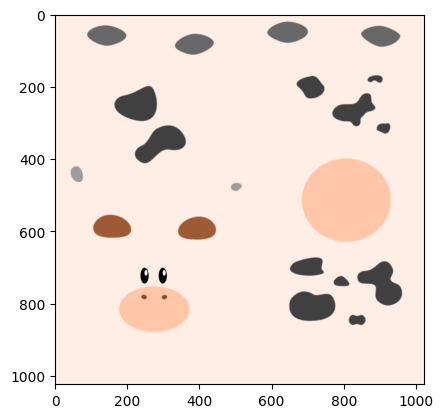

In [19]:
plt.imshow(tex_maps['material_1'])

# 3D Transforms

In [20]:
from pytorch3d.transforms import Transform3d, Rotate, Translate

In [21]:
# example 1
T = Translate(torch.FloatTensor([[1.0, 2.0, 3.0]]), device=device)
R = Rotate(torch.FloatTensor([[0, 1, 0], [0, 0, 1], [1, 0, 0]]), device=device)
RT = Transform3d(device=device).compose(R, T)

In [22]:
RT.get_matrix()

tensor([[[0., 1., 0., 0.],
         [0., 0., 1., 0.],
         [1., 0., 0., 0.],
         [1., 2., 3., 1.]]], device='cuda:0')

In [23]:
# applying Transform
verts_transformed = RT.transform_points(mesh_batch.verts_packed())
verts_transformed

tensor([[1.5000, 1.5000, 3.5000],
        [1.5000, 1.5000, 2.5000],
        [1.5000, 2.5000, 2.5000],
        [1.5000, 2.5000, 3.5000],
        [0.5000, 1.5000, 3.5000],
        [0.5000, 1.5000, 2.5000],
        [0.5000, 2.5000, 2.5000],
        [0.5000, 2.5000, 3.5000],
        [1.5000, 1.5000, 3.5000],
        [1.5000, 1.5000, 2.5000],
        [1.5000, 2.5000, 2.5000],
        [1.5000, 2.5000, 3.5000],
        [0.5000, 1.5000, 3.5000],
        [0.5000, 1.5000, 2.5000],
        [0.5000, 2.5000, 2.5000],
        [0.5000, 2.5000, 3.5000],
        [1.5000, 1.5000, 3.0000],
        [1.5000, 2.0000, 3.0000],
        [1.5000, 2.0000, 3.5000],
        [1.0000, 1.5000, 3.5000],
        [1.0000, 1.5000, 3.0000],
        [1.5000, 2.0000, 2.5000],
        [1.0000, 1.5000, 2.5000],
        [1.5000, 2.5000, 3.0000],
        [1.0000, 2.0000, 2.5000],
        [1.0000, 2.5000, 2.5000],
        [1.0000, 2.0000, 3.5000],
        [1.0000, 2.5000, 3.0000],
        [1.0000, 2.5000, 3.5000],
        [0.500

# Renderer

In [24]:
from pytorch3d.renderer import (
    OpenGLPerspectiveCameras, look_at_view_transform,
    RasterizationSettings, BlendParams,
    MeshRenderer, MeshRasterizer, HardPhongShader,
    Textures
)

In [25]:
R, T = look_at_view_transform(2.7, 10, 20)
cameras = OpenGLPerspectiveCameras(device=device, R=R, T=T)
raster_settings = RasterizationSettings(
    image_size=512,
    blur_radius=0.0,
    faces_per_pixel=1, # sets the value of K
)

renderer = MeshRenderer(
    rasterizer=MeshRasterizer(cameras=cameras, raster_settings=raster_settings),
    shader=HardPhongShader(device=device, cameras=cameras)
)

In [26]:
# Creating a texture for the mesh
white_tex = torch.ones_like(mesh_batch.verts_padded())
textures = Textures(verts_rgb=white_tex.to(device))
mesh_batch.textures = textures

In [27]:
images = renderer(mesh_batch, cameras=cameras)

In [28]:
def plot_side_by_side(images):
  n = images.shape[0]
  fig = plt.figure(figsize=(10, 10))
  for i in range(n):
    fig.add_subplot(1, n, i+1)
    plt.imshow(images[i, ..., :3].cpu().numpy())
    # plt.grid("off");
    # plt.axis("off");

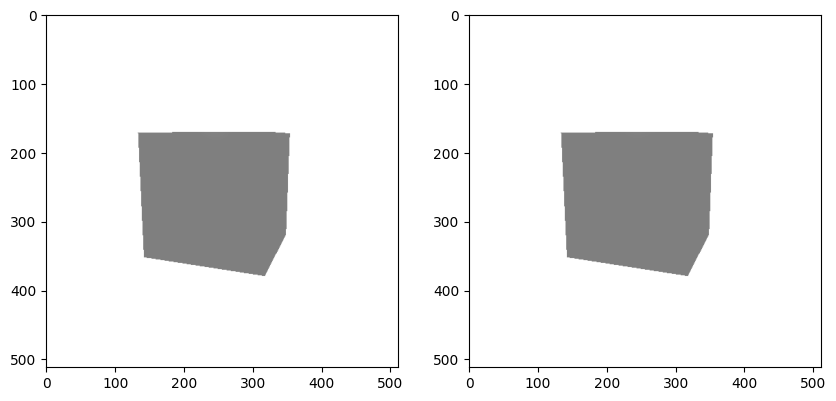

In [29]:
plot_side_by_side(images)

In [30]:
from math import radians, cos, sin

In [31]:
cos45 = cos(radians(45))
sin45 = sin(radians(45))
# applying a transform to the first mesh
SR = Transform3d(device=device).scale(1.0, 1.5, 1.0).rotate(
      R=torch.tensor([[cos45, -sin45, 0.0], [sin45, cos45, 0.0], [0.0, 0.0, 1.0]])
    )
verts0 = mesh_batch.verts_list()[0]
verts0 = SR.transform_points(verts0)
verts1 = mesh_batch.verts_list()[1]
mesh_batch2 = Meshes(verts=[verts0, verts1], faces=mesh_batch.faces_list(), textures=mesh_batch.textures)

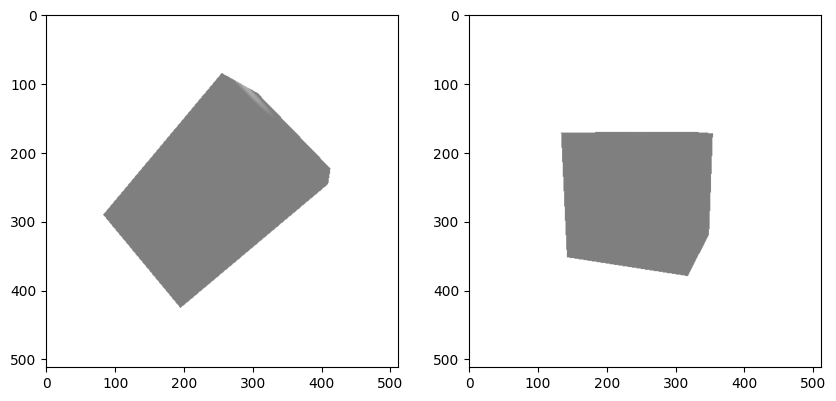

In [32]:
plot_side_by_side(renderer(mesh_batch2))

## Challenge

1. Change the texture of the mesh_batch so that each of the cubes is colored differently.

2. Experiment different transforms and compositions in terms of rotation, translation and scaling.

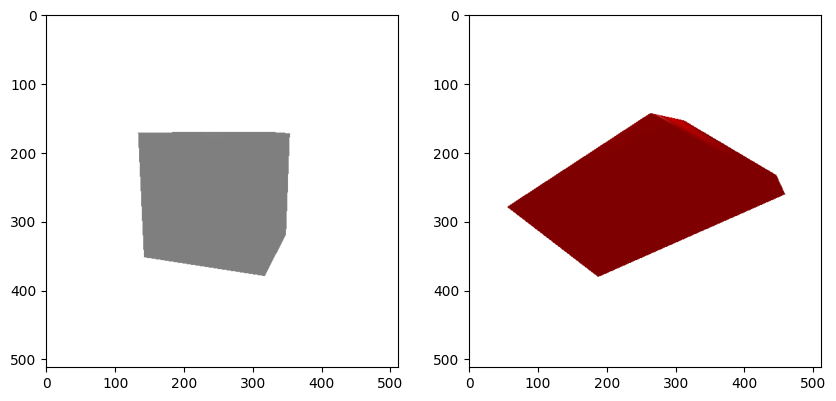

In [33]:
# write your code below this cell
new_color = torch.tensor([1.0, 0.0, 0.0], dtype=torch.float)
new_tex = torch.ones_like(mesh_batch.verts_padded())
new_tex[0,mesh_batch.verts_list()[0].shape[0]:,:] = new_color
new_tex[1,:,:] = new_color
textures_red = Textures(verts_rgb=new_tex.to(device))

cos30 = cos(radians(30))
sin30 = sin(radians(30))
SR = Transform3d(device=device).scale(1.0, 1.5, 1.0).rotate(
      R=torch.tensor([[cos30, -sin30, 0.0], [cos30, sin30, 0.0], [0.0, 0.0, 1.0]])
    )

verts1 = mesh_batch.verts_list()[1]
new_vertices = SR.transform_points(verts1)
mesh_batch_2 = Meshes(verts=[mesh_batch.verts_list()[0], new_vertices], faces=mesh_batch.faces_list(), textures=textures_red)
#mesh_batch2 = Meshes(verts=[verts0, verts1], faces=mesh_batch.faces_list(), textures=mesh_batch.textures)

images = renderer(mesh_batch_2, cameras=cameras)

plot_side_by_side(images)

## Implicit Modeling and *cubify*

In [34]:
from pytorch3d.ops import cubify
from pytorch3d.io import IO

In [35]:
x_axis = [-1, 1]
y_axis = [-1, 1]
z_axis = [-1, 1]
depth = 64
height = 64
width = 64

volume = torch.zeros([depth, height, width])

In [36]:
# some examples of surfaces defined implicitly
sphere = lambda x: x[0]**2 + x[1]**2 + x[2]**2 - 0.8**2
torus = lambda x: (0.6 - torch.sqrt(x[0]**2 + x[1]**2))**2 + x[2]**2 - 0.3**2

In [37]:
function = sphere
for d in range(depth):
  for h in range(height):
    for w in range(width):
      x = (d - depth/2) / (depth/2)
      y = (h - height/2) / (height/2)
      z = (w - width/2) / (width/2)
      point = torch.tensor([x, y, z])
      if function(point) <= 0:
        volume[d, h, w] = 1.0

In [38]:
cubified = cubify(volume.unsqueeze(0), 0.7)

In [39]:
IO().save_mesh(cubified, "cubified_mesh.obj")

## Challenge

3. Can you substitute the ````for```` loops for vectorized operations using Numpy or PyTorch functions?

4. Can you make the cubified sphere look "rounded"? 

5. Train a neural network to learn a occupancy function for a 3D surface. Use the ```cubify``` method to generate a mesh, and visualize it.

In [40]:
sphere = lambda x: x[0,:,:,:]*x[0,:,:,:] + x[1,:,:,:]*x[1,:,:,:] + x[2,:,:,:]*x[2,:,:,:]
torus = lambda x: torch.pow(1.0 - torch.sqrt(x[0,:,:,:]*x[0,:,:,:] + x[1,:,:,:]*x[1,:,:,:]),2) + x[2,:,:,:]*x[2,:,:,:] 

range = torch.linspace(-1,1,64)
X,Y,Z = torch.meshgrid(range,range,range)
points = torch.cat((X.unsqueeze(0),Y.unsqueeze(0),Z.unsqueeze(0)))

orbit = sphere(points)
mask = orbit < 1
volume[mask] = 1.0

cubified = cubify(volume.unsqueeze(0), 0.7)
IO().save_mesh(cubified, "cubified_mesh.obj")

#round the sphere
vertices = cubified.verts_packed()
vnorm = torch.linalg.vector_norm(vertices, dim=-1).unsqueeze(1)
verts = vertices / vnorm
new_sphere = Meshes([verts], cubified.faces_list())

IO().save_mesh(new_sphere, "new_sphere.obj")

/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
